# OilyGiant Mining Opportunies

###  The goal of our project is to use the provided data to determine the best location for a new well. We are also responsible for managing risk to identify which site offers the best opportunities.


In [ ]:
#!pip install scikit-learn
#!pip install joblib
#!pip install matplotlib
#!pip install seaborn

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [3]:
url1 = 'https://code.s3.yandex.net/datasets/geo_data_0.csv'
url2 = 'https://code.s3.yandex.net/datasets/geo_data_1.csv'
url3 = 'https://code.s3.yandex.net/datasets/geo_data_2.csv'
df = pd.read_csv(url1)
df1 = pd.read_csv(url2)
df2 = pd.read_csv(url3)

In [4]:
display(df.info())  
#display(df.describe()) 
display(df1.info())  
#display(df1.describe()) 
display(df2.info())  
#display(df2.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [5]:
# count for any duplicates
num_duplicates = df.duplicated().sum()
num_duplicates1 = df1.duplicated().sum()
num_duplicates2 = df2.duplicated().sum()
# print number of duplicate rows 
print(f"duplicate rows df: {num_duplicates}")
print(f"duplicate rows df1: {num_duplicates1}")
print(f"duplicate rows df2: {num_duplicates2}")

# check for duplicate customer id
duplicates = df['id'].duplicated().sum()
duplicates1 = df1['id'].duplicated().sum()
duplicates2 = df2['id'].duplicated().sum()
print(f'id duplicates df: {duplicates}')
print(f'id duplicates df1: {duplicates1}')
print(f'id duplicates df2: {duplicates2}')

duplicate rows df: 0
duplicate rows df1: 0
duplicate rows df2: 0
id duplicates df: 10
id duplicates df1: 4
id duplicates df2: 4


In [6]:
# review duplicate ids
df = df.sort_values(by='id')
duplicated_ids = df[df.duplicated('id')]['id']
duplicated_rows = df[df['id'].isin(duplicated_ids)]

print(duplicated_rows)

          id        f0        f1         f2     product
64022  74z30  0.741456  0.459229   5.153109  140.771492
66136  74z30  1.084962 -0.312358   6.990771  127.643327
3389   A5aEY -0.039949  0.156872   0.209861   89.249364
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
42529  AGS9W  1.454747 -0.479651   0.683380  126.370504
931    HZww2  0.755284  0.368511   1.863211   30.681774
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
1949   QcMuo  0.506563 -0.323775  -2.215583   75.496502
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
21426  Tdehs  0.829407  0.298807  -0.049563   96.035308
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
92341  TtcGQ  0.110711  1.022689   0.911381  101.318008
60140  TtcGQ  0.569276 -0.104876   6.440215   85.350186
89582  bsk9y  0.398908 -0.400253  10.122376  163.433078
97785  bsk9y  0.378429  0.005837   0.160827  160.637302
41724  bxg6G -0.823752  0.546319   3.630479   93

### At this stage early stage it's difficult to know how best to address the duplicate id values.  Assuming half the values (5 from df) are erroneous in some way, that portion of the data only makes up .05% of the whole data set; so shouldn't schew our results.  However if location HZww2 meets our model's criteria for production, but in reality only contains 1/5th of estimated barrels of oil, it may operate at a loss.  
### Assuming data associated with the duplicate ids are valid, and we are only selecting the top 200 sights for productions, the risks are relatively low to include them for now. 

In [7]:
# duplicate ids df1 and df2
df1 = df1.sort_values(by='id')
duplicated_ids1 = df1[df1.duplicated('id')]['id']
duplicated_rows1 = df1[df1['id'].isin(duplicated_ids1)]
df2 = df2.sort_values(by='id')
duplicated_ids2 = df2[df2.duplicated('id')]['id']
duplicated_rows2 = df2[df2['id'].isin(duplicated_ids2)]

print(duplicated_rows1)
print(duplicated_rows2)

          id         f0         f1        f2     product
84461  5ltQ6  18.213839   2.191999  3.993869  107.813044
5849   5ltQ6  -3.435401 -12.296043  1.999796   57.085625
1305   LHZR0  11.170835  -1.945066  3.002872   80.859783
41906  LHZR0  -8.989672  -4.286607  2.009139   57.085625
82178  bfPNe  -6.202799  -4.820045  2.995107   84.038886
2721   bfPNe  -9.494442  -5.463692  4.006042  110.992147
82873  wt4Uk  10.259972  -9.376355  4.994297  134.766305
47591  wt4Uk  -9.091098  -8.109279 -0.002314    3.179103
          id        f0        f1        f2     product
55967  KUPhW  1.211150  3.176408  5.543540  132.831802
45404  KUPhW  0.231846 -1.698941  4.990775   11.716299
49564  VF7Jo -0.883115  0.560537  0.723601  136.233420
11449  VF7Jo  2.122656 -0.858275  5.746001  181.716817
95090  Vcm5J  2.587702  1.986875  2.482245   92.327572
44378  Vcm5J -1.229484 -2.439204  1.222909  137.968290
28039  xCHr8  1.633027  0.368135 -2.378367    6.120525
43233  xCHr8 -0.847066  2.101796  5.597130  184

In [8]:
display(df.describe())
display(df1.describe()) 
display(df2.describe()) 

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


### We can see some variablility to the data sets.  The third data set (df2) has the highest average production of 95.  No extreme outliners are noted though, all f0-f2 fall between -30 and 30. 

### Overall the data conforms to the standards we need to process.   If any of the duplicate IDs end up making the short list (top 200), we can make a note of our concerns then.  

# Prepare the Data

In [9]:
# label dependent and independent variables 
target_df = df['product']
features_df = df[['f0', 'f1', 'f2']]
target_df1 = df1['product']
features_df1 = df1[['f0', 'f1', 'f2']]
target_df2 = df2['product']
features_df2 = df2[['f0', 'f1', 'f2']]
                   
# split the data 
features_train_df, features_valid_df, target_train_df, target_valid_df = train_test_split(features_df, target_df, test_size=0.25, random_state=12345)
features_train_df1, features_valid_df1, target_train_df1, target_valid_df1 = train_test_split(features_df1, target_df1, test_size=0.25, random_state=12345)
features_train_df2, features_valid_df2, target_train_df2, target_valid_df2 = train_test_split(features_df2, target_df2, test_size=0.25, random_state=12345)

# Model Data

In [10]:
# model using linear regression
model = LinearRegression()
model.fit(features_train_df, target_train_df)
predicted_valid_df = model.predict(features_valid_df)
average_predicted_volume = predicted_valid_df.mean()

# RSME
mse = mean_squared_error(target_valid_df, predicted_valid_df) 
rmse = np.sqrt(mse)

print('Average predicted volume of reserves:', average_predicted_volume)
print('Root Mean Squared Error (RMSE):', rmse)

Average predicted volume of reserves: 92.42627050535759
Root Mean Squared Error (RMSE): 37.9408744190829


In [11]:
# model using linear regression
model = LinearRegression()
model.fit(features_train_df1, target_train_df1)
predicted_valid_df1 = model.predict(features_valid_df1)
average_predicted_volume1 = predicted_valid_df1.mean()

# RSME
mse1 = mean_squared_error(target_valid_df1, predicted_valid_df1) 
rmse1 = np.sqrt(mse1)

print('Average predicted volume of Geo 1:', average_predicted_volume1)
print('Root Mean Squared Error (RMSE):', rmse1)

Average predicted volume of Geo 1: 68.94048826371241
Root Mean Squared Error (RMSE): 0.8865741236377094


In [12]:
# model using linear regression
model = LinearRegression()
model.fit(features_train_df2, target_train_df2)
predicted_valid_df2 = model.predict(features_valid_df2)
average_predicted_volume2 = predicted_valid_df2.mean()

# RSME
mse2 = mean_squared_error(target_valid_df2, predicted_valid_df2) 
rmse2 = np.sqrt(mse2)

print('Average predicted volume of Geo 2:', average_predicted_volume2)
print('Root Mean Squared Error (RMSE):', rmse1)

Average predicted volume of Geo 2: 94.99329903100912
Root Mean Squared Error (RMSE): 0.8865741236377094


### Most of the values above align with what we already know. The one issue that stands out is the high RMSE of the first data file. When we reviewed the data above, we didn't see any significant outliers, so let's graph and compare

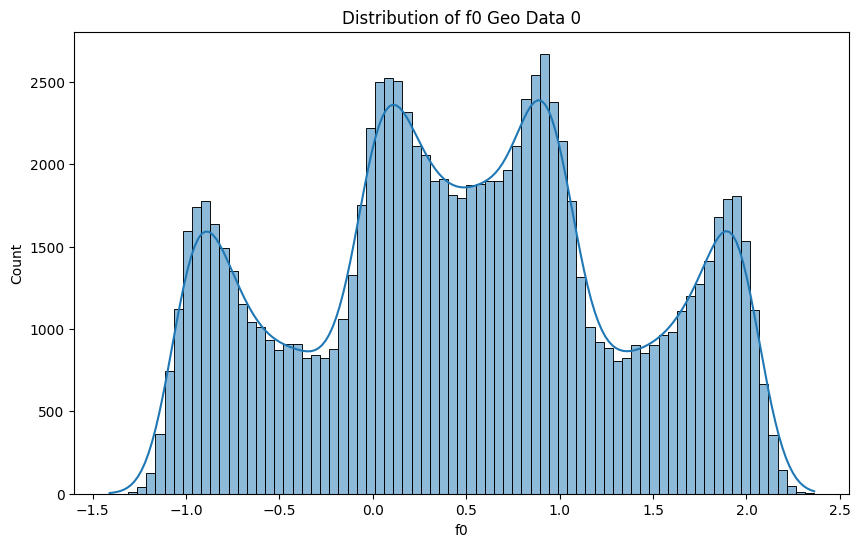

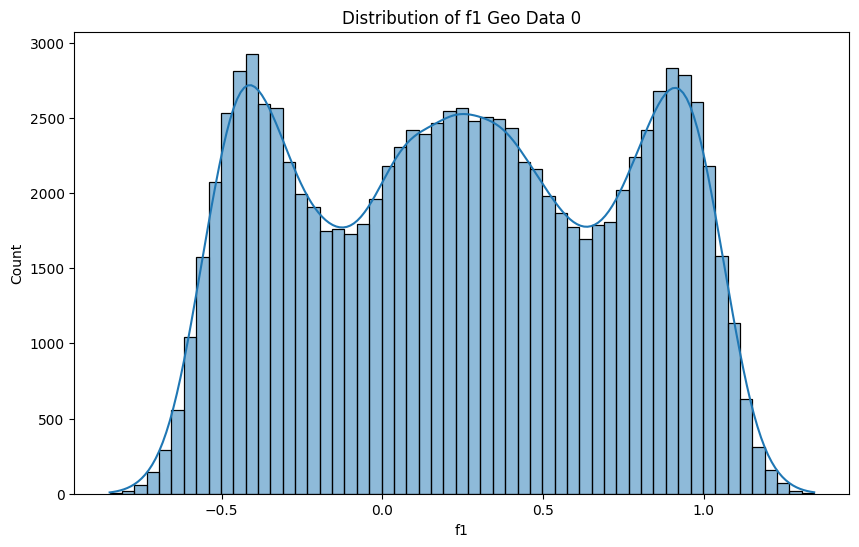

In [13]:
# plot for f0 
plt.figure(figsize=(10, 6))
sns.histplot(df['f0'], kde=True)
plt.title('Distribution of f0 Geo Data 0')
plt.show()

# plot for f1
plt.figure(figsize=(10, 6))
sns.histplot(df['f1'], kde=True)
plt.title('Distribution of f1 Geo Data 0')
plt.show()

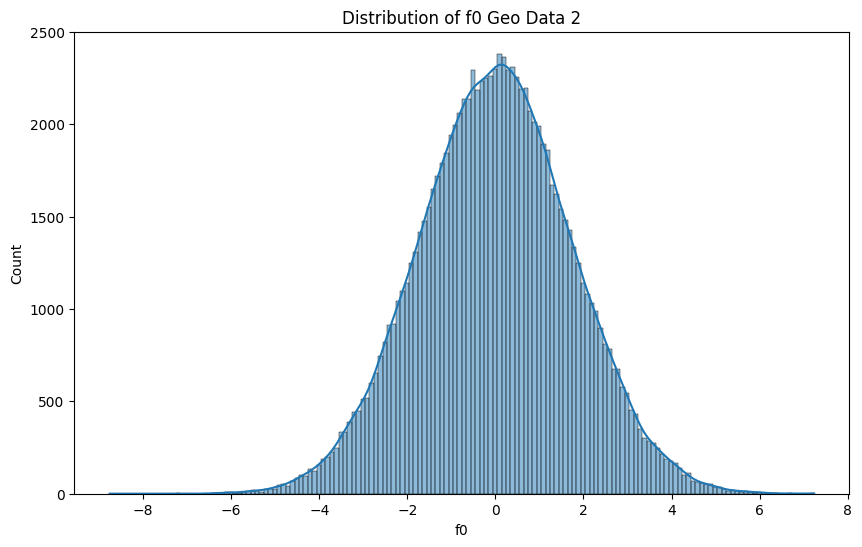

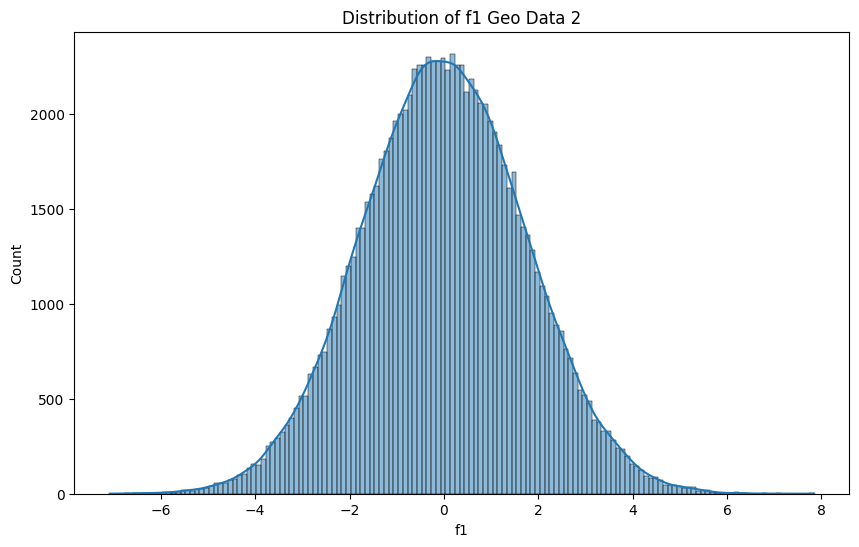

In [14]:
# plot for f0
plt.figure(figsize=(10, 6))
sns.histplot(df2['f0'], kde=True)
plt.title('Distribution of f0 Geo Data 2')
plt.show()

# plot for f1
plt.figure(figsize=(10, 6))
sns.histplot(df2['f1'], kde=True)
plt.title('Distribution of f1 Geo Data 2')
plt.show()

### "When graphing the data, we see a clear difference between the two sets of data when it comes to f0 and f1. The problem for the model appears to be that the distributions of f0 and f1 in the first data file have multiple peaks, which would create multiple possible trend lines when we apply a linear regression model.

# Profit Calculations

In [15]:
# calculations
budget = 100000000 
well_cost = budget / 200  
rev_unit = 4500 
volume_reserve_needed = budget - rev_unit
#operating expenses per well
well_op_expense = well_cost/rev_unit
print(f"Cost per Well: {well_cost}")
print(f"Volume of reserves sufficient for developing a new well: {volume_reserve_needed} ")
print(f"Each well needs to produce at least {well_op_expense:.2f} barrels to be profitable")

Cost per Well: 500000.0
Volume of reserves sufficient for developing a new well: 99995500 
Each well needs to produce at least 111.11 barrels to be profitable


### The highest producing region by our average above was Geo 2, with an average of 95 barrels. If we only target the top 200 wells in that region, which represents the top 2 percent, our goal of at least 111 barrels should be easily attainable.

In [16]:
# top 200 wells for each region
top_200_df = df['product'].nlargest(200)
total_top_200_df = top_200_df.sum()
top_200_df1 = df1['product'].nlargest(200)
total_top_200_df1 = top_200_df1.sum()
top_200_df2 = df2['product'].nlargest(200)
total_top_200_df2 = top_200_df2.sum()

#average each region
avg_geo = total_top_200_df/200
avg_geo1 = total_top_200_df1/200
avg_geo2 = total_top_200_df2/200

print(f"Average well product for top 200 wells Geo 0: {avg_geo }")
print(f"Average well product for top 200 wells Geo 1: {avg_geo1}")
print(f"Average well product for top 200 wells Geo 2: {avg_geo2}")

Average well product for top 200 wells Geo 0: 184.83373964536008
Average well product for top 200 wells Geo 1: 137.9454077409057
Average well product for top 200 wells Geo 2: 189.55147698176646


In [17]:
#profit per region 
pro_0 = rev_unit * total_top_200_df
pro_1 = rev_unit * total_top_200_df1
pro_2 = rev_unit * total_top_200_df2

# profits
print(f"Profit for Geo 0: ${pro_0:,.2f}")
print(f"Profit for Geo 1: ${pro_1:,.2f}")
print(f"Profit for Geo 2: ${pro_2:,.2f}")


Profit for Geo 0: $166,350,365.68
Profit for Geo 1: $124,150,866.97
Profit for Geo 2: $170,596,329.28


In [18]:
# gross profit
print(f"Projected Operating Profit for Geo 0: ${pro_0 - budget:,.2f}")
print(f"Projected Operating Profit for Geo 1: ${pro_1 - budget:,.2f}")
print(f"Projected Operating Profit for Geo 2: ${pro_2 - budget:,.2f}")
#margin
profit_mar = (pro_0 - budget) / pro_0
print(f"Profit Margin Geo 0: {profit_mar:.2%}")
profit_mar = (pro_1 - budget) / pro_1
print(f"Profit Margin Geo 1: {profit_mar:.2%}")
profit_mar = (pro_2 - budget) / pro_2
print(f"Profit Margin Geo 2: {profit_mar:.2%}")

Projected Operating Profit for Geo 0: $66,350,365.68
Projected Operating Profit for Geo 1: $24,150,866.97
Projected Operating Profit for Geo 2: $70,596,329.28
Profit Margin Geo 0: 39.89%
Profit Margin Geo 1: 19.45%
Profit Margin Geo 2: 41.38%


### If our projected production is accurate, Geo 2 would have an operating profit of 70 million and a profit margin of 41 percent.

# Risk Assessment

In [ ]:

# calculate the mean of the 'product' column
sample = df['product']
mean_value = sample.mean()
confidence_interval = st.t.interval(0.95, len(sample)-1, loc=mean_value, scale=st.sem(sample))
formatted_confidence_interval = (f"{confidence_interval[0]:,.2f}", f"{confidence_interval[1]:,.2f}")

print(f"Mean: {mean_value:,.2f}")
print(f"95% confidence interval: ({formatted_confidence_interval[0]}, {formatted_confidence_interval[1]})")

#bootstrapping
data = df['product']
state = np.random.RandomState(12345)
# Store the 99% quantile values to the values variable
values = []
for i in range(1000):
    subsample = data.sample(frac=1, replace=True, random_state=state)
    values.append(subsample.quantile(.99))

values = df['product']
    
lower = values.quantile(0.05)
upper = values.quantile(0.95)
lower_usd = lower*4500*200
upper_usd = upper*4500*200
print(f"5% quantile (lower): {lower:,.2f}")
print(f"95% quantile (upper): {upper:,.2f}")
print(f"Minimum Revenue: ${lower_usd:,.2f}")
print(f"Maximum Revenue: ${upper_usd:,.2f}")

Mean: 92.50
95% confidence interval: (92.23, 92.77)
5% quantile (lower): 24.02
95% quantile (upper): 161.21
Minimum Revenue: $21,617,223.63
Maximum Revenue: $145,085,699.27


In [24]:

# calculate the mean of the 'product' column
sample = df1['product']
mean_value = sample.mean()
confidence_interval = st.t.interval(0.95, len(sample)-1, loc=mean_value, scale=st.sem(sample))
formatted_confidence_interval = (f"{confidence_interval[0]:,.2f}", f"{confidence_interval[1]:,.2f}")

print(f"Mean: {mean_value:,.2f}")
print(f"95% confidence interval: ({formatted_confidence_interval[0]}, {formatted_confidence_interval[1]})")

#bootstrapping
data = df['product']
state = np.random.RandomState(12345)
# Store the 99% quantile values to the values variable
values = []
for i in range(1000):
    subsample = data.sample(frac=1, replace=True, random_state=state)
    values.append(subsample.quantile(.99))

values = df1['product']
    
lower = values.quantile(0.05)
upper = values.quantile(0.95)
lower_usd = lower*4500*200
upper_usd = upper*4500*200
print(f"5% quantile (lower): {lower:,.2f}")
print(f"95% quantile (upper): {upper:,.2f}")
print(f"Minimum Revenue: ${lower_usd:,.2f}")
print(f"Maximum Revenue: ${upper_usd:,.2f}")


Mean: 68.83
95% confidence interval: (68.54, 69.11)
5% quantile (lower): 0.00
95% quantile (upper): 137.95
Minimum Revenue: $0.00
Maximum Revenue: $124,150,866.97


In [25]:

# Calculate the mean of the 'product' column
sample = df2['product']
mean_value = sample.mean()
confidence_interval = st.t.interval(0.95, len(sample)-1, loc=mean_value, scale=st.sem(sample))
formatted_confidence_interval = (f"{confidence_interval[0]:,.2f}", f"{confidence_interval[1]:,.2f}")

print(f"Mean: {mean_value:,.2f}")
print(f"95% confidence interval: ({formatted_confidence_interval[0]}, {formatted_confidence_interval[1]})")

#bootstrapping
data = df['product']
state = np.random.RandomState(12345)
# Store the 99% quantile values to the values variable
values = []
for i in range(1000):
    subsample = data.sample(frac=1, replace=True, random_state=state)
    values.append(subsample.quantile(.99))

values = df2['product']
    
lower = values.quantile(0.05)
upper = values.quantile(0.95)
lower_usd = lower*4500*200
upper_usd = upper*4500*200
print(f"5% quantile (lower): {lower:,.2f}")
print(f"95% quantile (upper): {upper:,.2f}")
print(f"Minimum Revenue: ${lower_usd:,.2f}")
print(f"Maximum Revenue: ${upper_usd:,.2f}")

Mean: 95.00
95% confidence interval: (94.72, 95.28)
5% quantile (lower): 24.68
95% quantile (upper): 165.67
Minimum Revenue: $22,210,353.42
Maximum Revenue: $149,098,641.84


### When we take measures to control risk, using bootstrapping and the 5% confidence interval, the last region comes out ahead with a mean product of 95, a lower quantile of 24.68, and an upper quantile of 165.67. Even though Geo 2 has a couple of duplicate ID values, 2 out of 10,000 is not enough to change its standing as the best option. The first region may be a close second by the average and upper and lower quantile numbers; however, given the Root Mean Squared Error score above, we cannot have a lot of confidence in our statistical analysis model. The data tells us region 2 is the least productive, possibly generating 0 profit.

### Our recommendation to mine Geo 2 over the other two regions is apparent based on the data. If the top 200 wells produce as the tests show, it should return a 41 percent profit margin. Even if the test data falls short of estimates, our statistical analysis puts the upper margin at a 33 percent profit margin.

### 

All project files are available at Github : https://github.com/Tom-Kinstle/sprint_9